Python for Data & Analytics - 2nd Edition<br>
Chapter 17, section 7

*** requires datafiles: ORNG.csv, USIX.csv

In [1]:
import pandas as pd
stockSymbol = 'ORNG'
stock = pd.read_csv(stockSymbol+'.csv', index_col='Date', parse_dates=True,
                    usecols=['Date', 'AdjustedClose'])
stock.columns = ['Stock_Adj_Close']
stock.head()

,Stock_Adj_Close
Date,
2017-01-03,54.595
2017-01-04,54.534
2017-01-05,54.812
2017-01-06,55.423
2017-01-09,55.930


In [2]:
marketSymbol = 'USIX'
market = pd.read_csv(marketSymbol+'.csv', index_col='Date', parse_dates=True,
                     usecols=['Date', 'AdjustedClose'])
market.columns = ['Market_Adj_Close']
market.head()

,Market_Adj_Close
Date,
2017-01-03,412.295
2017-01-04,414.748
2017-01-05,414.418
2017-01-06,415.901
2017-01-09,414.528


In [3]:
df = pd.concat([stock, market], axis=1, join='inner')
df.head()

,Stock_Adj_Close,Market_Adj_Close
Date,,
2017-01-03,54.595,412.295
2017-01-04,54.534,414.748
2017-01-05,54.812,414.418
2017-01-06,55.423,415.901
2017-01-09,55.930,414.528


In [4]:
df['Stock_Return'] = df['Stock_Adj_Close'].pct_change()
df['Market_Return'] = df['Market_Adj_Close'].pct_change()
df = df[1:] # drop the first row (return is NaN)
df.head()

,Stock_Adj_Close,Market_Adj_Close,Stock_Return,Market_Return
Date,,,,
2017-01-04,54.534,414.748,-0.001117,0.005950
2017-01-05,54.812,414.418,0.005098,-0.000796
2017-01-06,55.423,415.901,0.011147,0.003579
2017-01-09,55.930,414.528,0.009148,-0.003301
2017-01-10,55.987,414.528,0.001019,0.000000


<AxesSubplot:xlabel='Market_Return', ylabel='Stock_Return'>

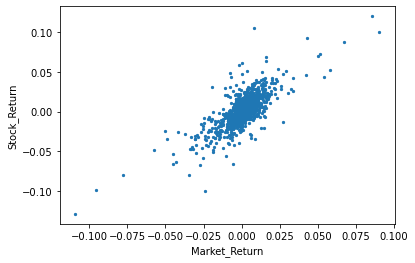

In [5]:
df.plot.scatter('Market_Return', 'Stock_Return', marker='.')

In [6]:
from scipy.stats import linregress
beta, alpha, rvalue, pvalue, stderr = \
   linregress(df.Market_Return, df.Stock_Return)

In [7]:
print('Beta:     ', round(beta,2))
print('Alpha:    ', round(alpha,2))
print('R-squared:', round(rvalue**2 * 100), '%')
print('pvalue:   ', round(pvalue, 4))
print('stderr:   ', round(stderr, 4))

Beta:      1.23
Alpha:     0.0
R-squared: 58 %
pvalue:    0.0
stderr:    0.0295


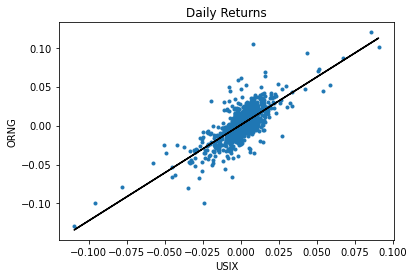

In [8]:
import matplotlib.pyplot as plt
plt.scatter(df.Market_Return, df.Stock_Return, marker='.')
plt.plot(df.Market_Return, alpha + beta*df.Market_Return, color='black')
plt.xlabel(marketSymbol)
plt.ylabel(stockSymbol)
plt.title('Daily Returns')
plt.show()

Code from: Python for Data & Analytics, (c) 2025 Rose River Software, LLC